In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our charts
sns.set_style("whitegrid")


In [3]:
# Load the new dataset
df = pd.read_csv('cordon_counts.csv')

# Display the first 5 rows to understand the new columns
df.head()

,Site,Town Centre,Location,Cyclists (Total) Average,Pedestrians (Total) Average,Cyclists (Total 2015),Pedestrians (Total 2015),Cyclists Inbound (AM 2015),Cyclists Outbound (AM 2015),Pedestrians Inbound (AM 2015),...,Cyclists (Total 2018),Pedestrians (Total 2018),Cyclists Inbound (AM 2018),Cyclists Outbound (AM 2018),Pedestrians Inbound (AM 2018),Pedestrians Outbound (AM 2018),Cyclists Inbound (PM 2018),Cyclists Outbound (PM 2018),Pedestrians Inbound (PM 2018),Pedestrians Outbound (PM 2018)
0,C02,Civic,"(-35.283764, 149.106963)",6,1,1.0,3.0,0.0,0.0,1.0,...,6,0,3,0,0,0,1,2,0,0
1,C03,Civic,"(-35.283054, 149.106936)",8,0,3.0,0.0,3.0,0.0,0.0,...,9,0,7,0,0,0,0,2,0,0
2,T07,Tuggeranong,"(-35.425363, 149.072671)",32,60,30.0,52.0,14.0,2.0,14.0,...,32,61,14,4,24,10,5,9,8,19
3,C08,Civic,"(-35.272525, 149.120329)",235,208,251.0,219.0,142.0,9.0,81.0,...,219,192,118,8,73,6,14,79,12,101
4,W18,Woden,"(-35.344785, 149.083195)",166,521,208.0,568.0,103.0,6.0,286.0,...,162,444,79,2,218,25,8,73,31,170


In [5]:
print(df.columns)

Index(['Site', 'Town Centre', 'Location', 'Cyclists (Total) Average',
       'Pedestrians (Total) Average', 'Cyclists (Total 2015)',
       'Pedestrians (Total 2015)', 'Cyclists Inbound (AM 2015)',
       'Cyclists Outbound (AM 2015)', 'Pedestrians Inbound (AM 2015)',
       'Pedestrians Outbound (AM 2015)', 'Cyclists Inbound (PM 2015)',
       'Cyclists Outbound (PM 2015)', 'Pedestrians Inbound (PM 2015)',
       'Pedestrians Outbound (PM 2015)', 'Cyclists (Total 2016)',
       'Pedestrians (Total 2016)', 'Cyclists Inbound (AM 2016)',
       'Cyclists Outbound (AM 2016)', 'Pedestrians Inbound (AM 2016)',
       'Pedestrians Outbound (AM 2016)', 'Cyclists Inbound (PM 2016)',
       'Cyclists Outbound (PM 2016)', 'Pedestrians Inbound (PM 2016)',
       'Pedestrians Outbound (PM 2016)', 'Cyclists (Total 2017)',
       'Pedestrians (Total 2017)', 'Cyclists Inbound (AM 2017)',
       'Cyclists Outbound (AM 2017)', 'Pedestrians Inbound (AM 2017)',
       'Pedestrians Outbound (AM 2017)', 'C

In [6]:
# --- Step 1: Reshape the data from "wide" to "long" format ---
# First, identify the columns that describe the location
id_vars = ['Site', 'Town Centre', 'Location']

# Next, get the list of all the columns that contain count data. We will ignore the 'Total' columns for now.
value_vars = [col for col in df.columns if 'Total' not in col and col not in id_vars]

# Use the pandas 'melt' function to unpivot the table
df_long = pd.melt(
    df,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='Metric', # This new column will hold the old column names (e.g., 'Cyclists Inbound (AM 2015)')
    value_name='Count'   # This new column will hold the actual count values
)

# --- Step 2: Extract details from the 'Metric' column ---
# We will use a technique called Regular Expressions (regex) to pull out the details from the Metric strings.
# This pattern looks for the parts we need: Mode, Direction, TimeOfDay, and Year.
pattern = r'(Cyclists|Pedestrians) (Inbound|Outbound) \((AM|PM) (\d{4})\)'

# Create new columns by extracting the data that matches the pattern
df_long[['Mode', 'Direction', 'TimeOfDay', 'Year']] = df_long['Metric'].str.extract(pattern)


# --- Step 3: Final cleanup ---
# Drop rows where the pattern didn't match (if any) and convert Count to a number
df_long.dropna(subset=['Mode', 'Direction', 'TimeOfDay', 'Year'], inplace=True)
df_long['Count'] = pd.to_numeric(df_long['Count'], errors='coerce').fillna(0)


# Now, display the first 5 rows of our new, beautifully reshaped data!
print("Reshaped and Cleaned Data:")
df_long.head()

Reshaped and Cleaned Data:


,Site,Town Centre,Location,Metric,Count,Mode,Direction,TimeOfDay,Year
0,C02,Civic,"(-35.283764, 149.106963)",Cyclists Inbound (AM 2015),0.0,Cyclists,Inbound,AM,2015
1,C03,Civic,"(-35.283054, 149.106936)",Cyclists Inbound (AM 2015),3.0,Cyclists,Inbound,AM,2015
2,T07,Tuggeranong,"(-35.425363, 149.072671)",Cyclists Inbound (AM 2015),14.0,Cyclists,Inbound,AM,2015
3,C08,Civic,"(-35.272525, 149.120329)",Cyclists Inbound (AM 2015),142.0,Cyclists,Inbound,AM,2015
4,W18,Woden,"(-35.344785, 149.083195)",Cyclists Inbound (AM 2015),103.0,Cyclists,Inbound,AM,2015


In [7]:
# Filter for cyclists from our NEW reshaped data
df_cyclists = df_long[df_long['Mode'] == 'Cyclists'].copy()

# Now you can run your analysis on df_cyclists
print("\nBusiest locations for cyclists:")
busiest_locations = df_cyclists.groupby('Location')['Count'].sum().sort_values(ascending=False)
print(busiest_locations.head())


Busiest locations for cyclists:
Location
(-35.275181, 149.125627)    4904.0
(-35.272743, 149.122656)    4747.0
(-35.291798, 149.126963)    4536.0
(-35.284088, 149.106716)    3520.0
(-35.291756, 149.127211)    3447.0
Name: Count, dtype: float64


In [8]:
# Filter for cyclists from our NEW reshaped data
df_cyclists = df_long[df_long['Mode'] == 'Cyclists'].copy()

# Now you can run your analysis on df_cyclists
print("\nBusiest locations for cyclists:")
busiest_locations = df_cyclists.groupby('Town Centre')['Count'].sum().sort_values(ascending=False)
print(busiest_locations.head())


Busiest locations for cyclists:
Town Centre
Civic          39956.0
Belconnen       5263.0
Woden           2961.0
Tuggeranong     2794.0
Gungahlin       1359.0
Name: Count, dtype: float64


In [11]:
print(df_cyclists.columns)

Index(['Site', 'Town Centre', 'Location', 'Metric', 'Count', 'Mode',
       'Direction', 'TimeOfDay', 'Year'],
      dtype='object')


Total cyclist counts for AM vs. PM:
TimeOfDay
AM    27168.0
PM    25165.0
Name: Count, dtype: float64


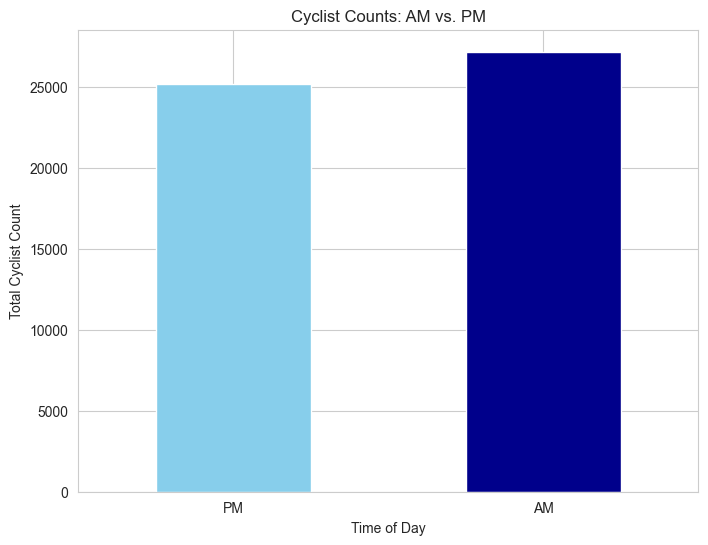

In [12]:
# --- NEW Analysis: Compare AM vs. PM Cycling Activity ---

# Group by the 'TimeOfDay' column to compare morning vs. afternoon/evening
time_of_day_counts = df_cyclists.groupby('TimeOfDay')['Count'].sum()

print("Total cyclist counts for AM vs. PM:")
print(time_of_day_counts)


# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
time_of_day_counts.sort_values().plot(kind='bar', color=['skyblue', 'darkblue'])
plt.title('Cyclist Counts: AM vs. PM')
plt.xlabel('Time of Day')
plt.ylabel('Total Cyclist Count')
plt.xticks(rotation=0) # Keeps the labels (AM, PM) horizontal
plt.show()

Total cyclist counts by year:
Year
2015    13086.0
2016    13252.0
2017    12655.0
2018    13340.0
Name: Count, dtype: float64


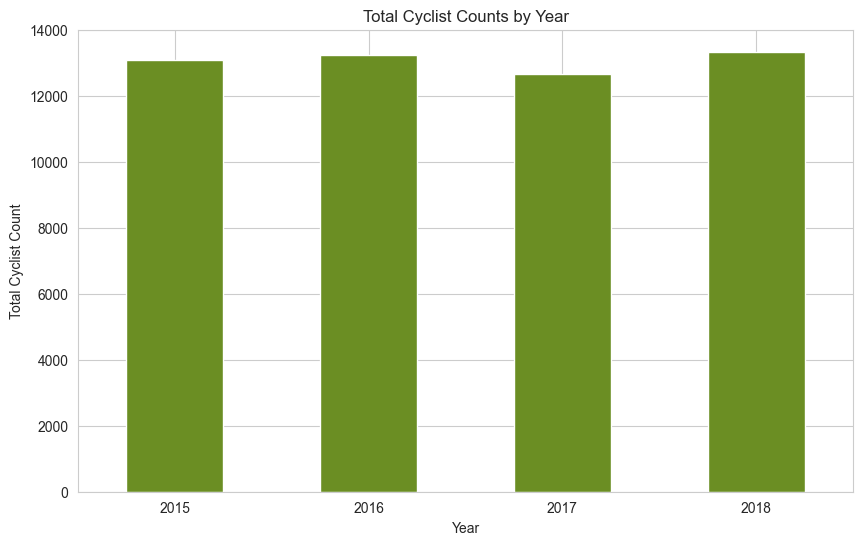

In [13]:
# --- FINAL Analysis: Compare Cyclist Counts by Year ---

# Group by the 'Year' column to see trends over time
yearly_counts = df_cyclists.groupby('Year')['Count'].sum()

print("Total cyclist counts by year:")
print(yearly_counts)


# Create a bar chart to visualize the comparison
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='olivedrab')
plt.title('Total Cyclist Counts by Year')
plt.xlabel('Year')
plt.ylabel('Total Cyclist Count')
plt.xticks(rotation=0) # Keeps the years horizontal
plt.show()

Top 10 Busiest Cycling Locations:
Town Centre
Civic          39956.0
Belconnen       5263.0
Woden           2961.0
Tuggeranong     2794.0
Gungahlin       1359.0
Name: Count, dtype: float64


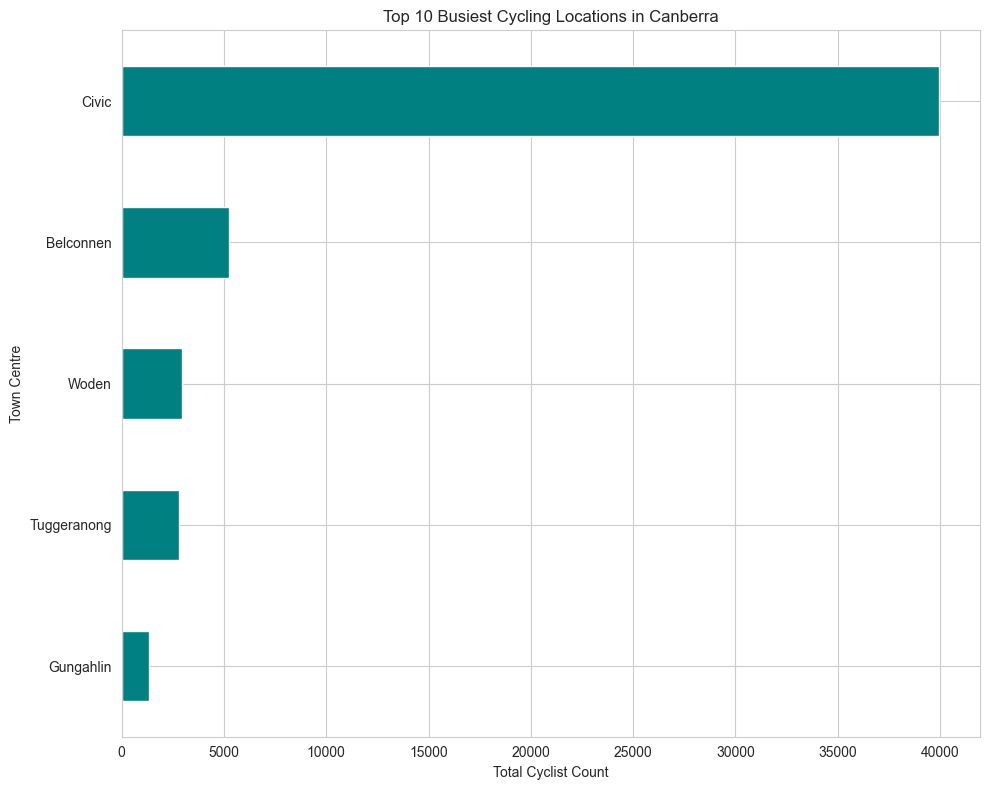

In [16]:
# --- Analysis: Busiest Cycling Locations ---

# Group by location and sum the counts, then sort to find the busiest
busiest_locations = df_cyclists.groupby('Town Centre')['Count'].sum().sort_values(ascending=False)

print("Top 10 Busiest Cycling Locations:")
print(busiest_locations.head(10))

# Create a horizontal bar chart to visualize the top 10
plt.figure(figsize=(10, 8))
# We use .sort_values(ascending=True) here so the biggest bar appears at the top
busiest_locations.head(10).sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Top 10 Busiest Cycling Locations in Canberra')
plt.xlabel('Total Cyclist Count')
plt.ylabel('Town Centre')
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

Pivoted Data for Charting:
TimeOfDay      AM      PM
Year                     
2015       7040.0  6046.0
2016       7048.0  6204.0
2017       6290.0  6365.0
2018       6790.0  6550.0


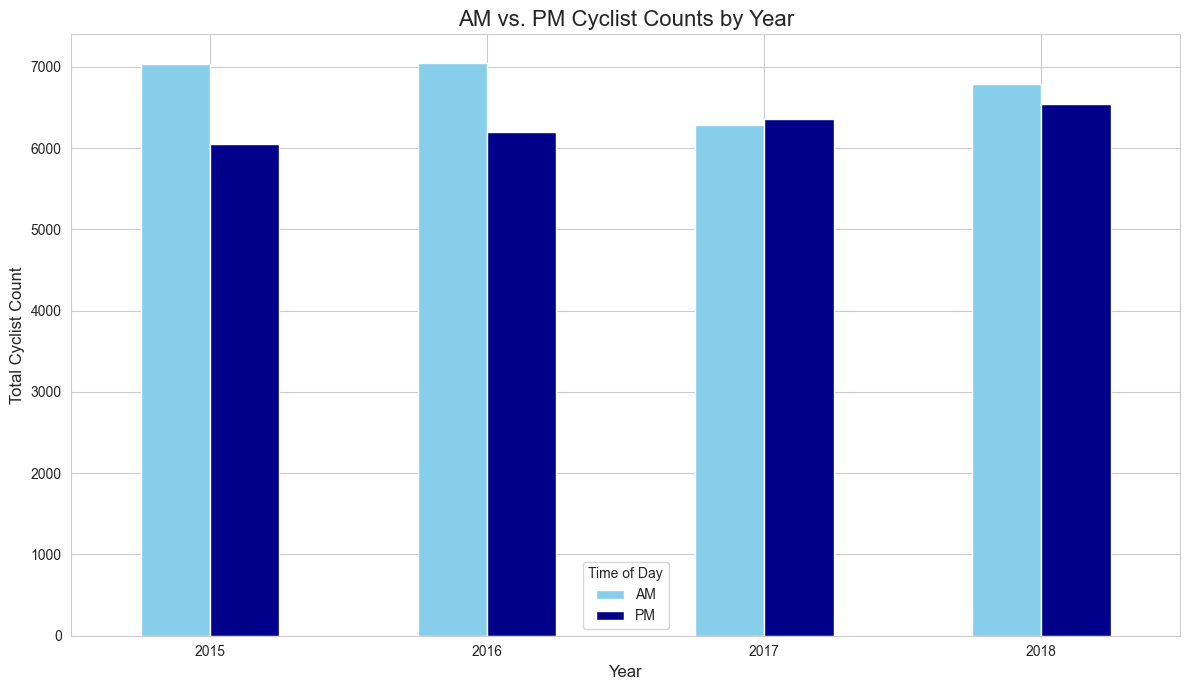

In [19]:
# --- Create a Grouped Bar Chart for AM/PM Counts by Year ---

# Step 1: Create a pivot table to structure the data correctly.
# We want Years as the rows, AM/PM as the columns, and the sum of Count as the values.
yearly_ampm_counts = df_cyclists.pivot_table(
    index='Year',
    columns='TimeOfDay',
    values='Count',
    aggfunc='sum'
)

print("Pivoted Data for Charting:")
print(yearly_ampm_counts)


# Step 2: Create the grouped bar chart from the pivot table
yearly_ampm_counts.plot(kind='bar',
                      figsize=(12, 7),
                      color=['skyblue', 'darkblue']) # Assign colors for PM and AM

# Add titles and labels for clarity
plt.title('AM vs. PM Cyclist Counts by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Cyclist Count', fontsize=12)
plt.xticks(rotation=0) # Keep the years horizontal
plt.legend(title='Time of Day') # Add a legend to explain the colors
plt.tight_layout()
plt.show()